In [33]:
!pip install opendatasets

In [34]:
import opendatasets as od

In [35]:
od.download("https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data")

Skipping, found downloaded files in "./extrovert-vs-introvert-behavior-data" (use force=True to force download)


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv("/content/extrovert-vs-introvert-behavior-data/personality_dataset.csv")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [38]:
data.value_counts("Personality")

,count
Personality,
Extrovert,1491
Introvert,1409


In [39]:
data.shape

(2900, 8)

In [40]:
print(data.dtypes)


Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


In [41]:
print(data.isnull().sum())


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [42]:
# data['Stage_fear'] = data['Stage_fear'].fillna('Unknown')
#there is no need to fill the handle the null values in this dataset

In [44]:
data.value_counts("Stage_fear")

,count
Stage_fear,
No,1417
Yes,1410


In [45]:
columns_to_fix = ['Stage_fear', 'Drained_after_socializing','Personality']
for column in columns_to_fix:
    data[column] = data[column].replace("No", 0)
    data[column] = data[column].replace("Yes", 1)
    data[column] = data[column].replace("Introvert", 0)
    data[column] = data[column].replace("Extrovert", 1)

<ipython-input-45-5ac1e9122cb4>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Yes", 1)
<ipython-input-45-5ac1e9122cb4>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Extrovert", 1)


In [46]:
print(data.dtypes)

Time_spent_Alone             float64
Stage_fear                   float64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing    float64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object


In [61]:
data.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,1
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,1
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,0
2898,11.0,1.0,1.0,NaN,1.0,2.0,0.0,0
2899,3.0,0.0,6.0,6.0,0.0,6.0,9.0,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [50]:
x=data.drop("Personality",axis=1)
y=data["Personality"]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=25)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25)

In [52]:
model.score(x_train,y_train)

0.9810344827586207

In [53]:
model.score(x_test,y_test)

0.9137931034482759

In [54]:
y_predict=model.predict(x_test)

In [56]:
print("Actual condition of the person", y_test.iloc[0])
print("Predicted  condition of the person", y_predict[0])

Actual condition of the person 0
Predicted  condition of the person 0


In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[254,  24],
       [ 26, 276]])

Text(95.72222222222221, 0.5, 'Truth')

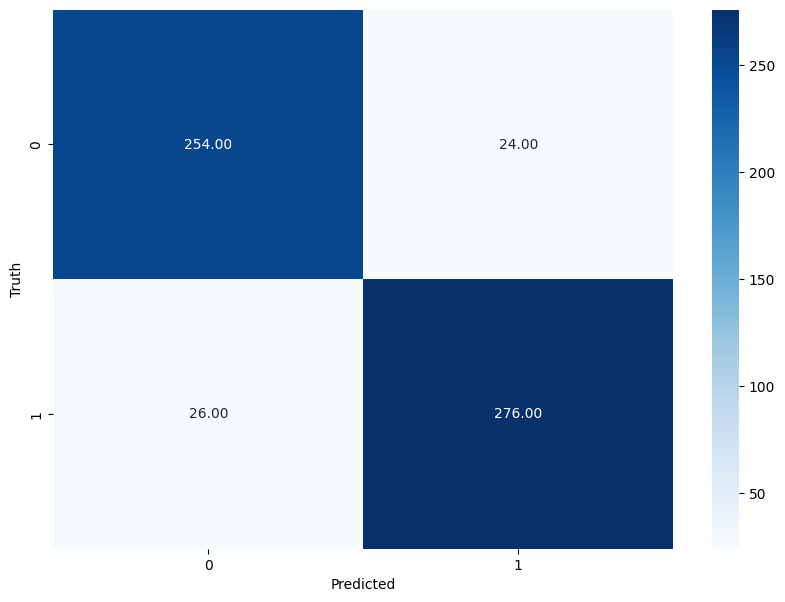

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap="Blues",fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Testing with the input fields

In [64]:

input_data=(3.0,0.0,6.0,6.0,0.0,6.0,9.0	)
input_data_as_array=np.asarray(input_data)
input_data_reshaped=input_data_as_array.reshape(1,-1)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    predictions = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('the person is an Introvert')
else:
  print('The person is an Extrovert')

[1]
The person is an Extrovert
